In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

#0 perceptron model (AND gate) - only (0,0) input

hyperparameter 설정

In [2]:
# input, perceptron, learning rate 설정
input_dim = 2
units = 1
learning_rate = 0.01

가중치 제작

In [14]:
w = torch.rand(size=(input_dim, units), requires_grad = True)

b = torch.zeros(size = (units,), requires_grad = True)

In [15]:
print(w)
print(w.shape)
print(b)
print(b.shape)

tensor([[0.1900],
        [0.5748]], requires_grad=True)
torch.Size([2, 1])
tensor([0.], requires_grad=True)
torch.Size([1])


w*x + b

In [10]:
# label 제작
input = torch.tensor([[0., 0.]])
label = torch.tensor([0.])

In [11]:
input.shape
label.shape

torch.Size([1])

In [19]:
# w*x + b
output_no_activation = torch.matmul(input, w) + b
result = torch.maximum(torch.tensor(0.), output_no_activation)

In [20]:
result

tensor([[0.]], grad_fn=<MaximumBackward0>)

In [21]:
loss = torch.mean(torch.square(label -result))

training

In [23]:
loss.backward()

In [24]:
w.data-= learning_rate*w.grad
b.data-= learning_rate*b.grad

In [25]:
print(w,"\n",b)

tensor([[0.1900],
        [0.5748]], requires_grad=True) 
 tensor([0.], requires_grad=True)


training 후 grad 초기화

if 초기화를 하지 않으면 데이터 왜곡 발생 = training이 정상적으로 진행 x

In [26]:
w.grad = None
b.grad = None

___
훈련결과 보기

In [34]:
test_inputs = np.random.uniform(low=0, high=1, size=(5000,2)).astype(np.float32)
test_inputs = torch.tensor(test_inputs)

x = torch.matmul(test_inputs,w)+b
x = torch.maximum(torch.tensor(0.), x)

In [38]:
print(test_inputs[:10:])
print(x[:10:])

tensor([[0.2396, 0.0622],
        [0.5929, 0.7606],
        [0.0685, 0.6829],
        [0.4839, 0.3487],
        [0.0599, 0.5719],
        [0.9255, 0.6938],
        [0.4696, 0.0929],
        [0.7365, 0.4855],
        [0.8746, 0.0944],
        [0.3817, 0.7852]])
tensor([[0.0813],
        [0.5498],
        [0.4055],
        [0.2924],
        [0.3401],
        [0.5747],
        [0.1426],
        [0.4190],
        [0.2205],
        [0.5238]], grad_fn=<SliceBackward0>)


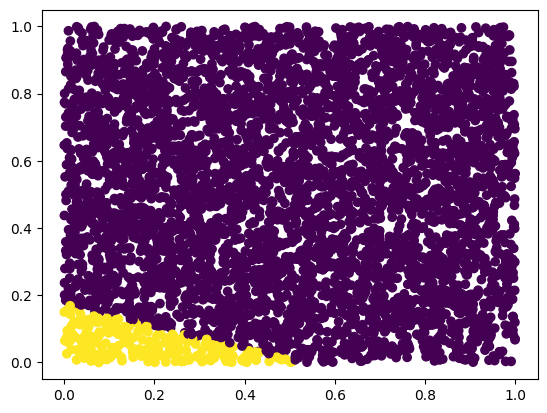

In [36]:
plt.scatter(test_inputs[:,0], test_inputs[:,1], c=x[:]<0.1)

#perceptron model training (AND GATE) : all data

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [7]:
# hyperparameter 준비
input_dim = 2
units = 1
learning_rate = 1e-3

In [8]:
w= torch.rand(size=(input_dim, units), requires_grad = True)
b = torch.zeros(size = (units,), requires_grad = True)

In [9]:
def predict(input):
  x = torch.matmul(input,w)+b
  x = torch.relu(x)
  return x

In [11]:
def mse_loss(labels,predictions):
  loss = torch.mean(torch.square(labels-predictions))
  return loss

In [20]:
def train(inputs, labels):
  # predict
  predictions = predict(inputs)

  # loss function
  loss = mse_loss(labels, predictions)

  # backpropa
  loss.backward()

  # weight update
  w.data = w - learning_rate*w.grad
  b.data = b - learning_rate*b.grad

  # 기울기 갱신
  w.grad = None
  b.grad = None
  return loss

In [21]:
inputs = torch.tensor([[0,0],
                        [0,1],
                        [1,0],
                        [1,1]], dtype = torch.float32)
labels = torch.tensor([0,0,0,1], dtype = torch.float32)

In [22]:
inputs.shape, labels.shape

(torch.Size([4, 2]), torch.Size([4]))

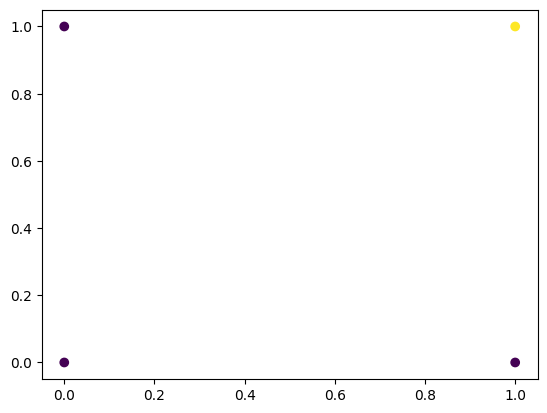

In [23]:
plt.scatter(inputs[:,0],inputs[:,1], c=labels[:])

In [36]:
for epoch in range(100):
  for x,y in zip(inputs, labels):
    loss = train(x,y)
  print("Epoch {}: loss = {}".format(epoch+1, float(loss)))

Epoch 1: loss = 0.10340756177902222
Epoch 2: loss = 0.10361328721046448
Epoch 3: loss = 0.10381545126438141
Epoch 4: loss = 0.10401412844657898
Epoch 5: loss = 0.10420933365821838
Epoch 6: loss = 0.10440114140510559
Epoch 7: loss = 0.10458949953317642
Epoch 8: loss = 0.10477448254823685
Epoch 9: loss = 0.10495615005493164
Epoch 10: loss = 0.10513438284397125
Epoch 11: loss = 0.105309396982193
Epoch 12: loss = 0.10548107326030731
Epoch 13: loss = 0.10564951598644257
Epoch 14: loss = 0.10581464320421219
Epoch 15: loss = 0.1059766411781311
Epoch 16: loss = 0.10613542795181274
Epoch 17: loss = 0.1062910258769989
Epoch 18: loss = 0.10644350945949554
Epoch 19: loss = 0.10659290850162506
Epoch 20: loss = 0.10673917829990387
Epoch 21: loss = 0.10688235610723495
Epoch 22: loss = 0.1070224717259407
Epoch 23: loss = 0.10715959966182709
Epoch 24: loss = 0.1072937622666359
Epoch 25: loss = 0.10742488503456116
Epoch 26: loss = 0.10755307972431183
Epoch 27: loss = 0.1076783761382103
Epoch 28: loss = 

In [37]:
print(w)
print(b)

tensor([[0.1834],
        [0.7238]], requires_grad=True)
tensor([-0.2375], requires_grad=True)


In [72]:
test_inputs = np.random.uniform(low=0, high=1, size=(5000,2)).astype(np.float32)

In [73]:
test_inputs = torch.tensor(test_inputs)

In [74]:
test_predictions=predict(test_inputs)

In [75]:
test_predictions

tensor([[0.8416],
        [0.6729],
        [0.5216],
        ...,
        [0.7694],
        [0.7173],
        [1.1325]], grad_fn=<ReluBackward0>)

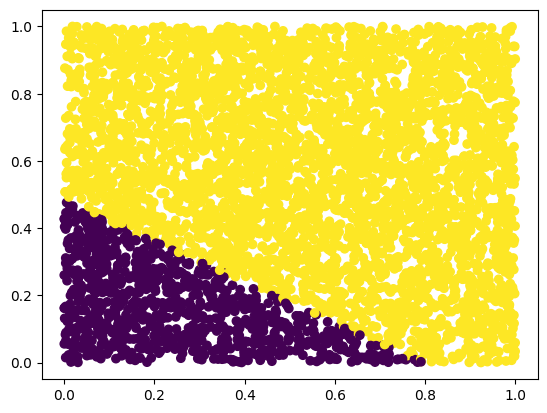

In [76]:
plt.scatter(test_inputs[:,0], test_inputs[:,1], c=test_predictions[:]>0.5)

#perceptron model training (OR GATE) : all data

In [46]:
# hyperparameter setting
input_dims = 2
units = 1
lr = 1e-3

In [48]:
# weight initialization
w = torch.rand(size=(input_dims, units), requires_grad=True)
b = torch.zeros(size=(units,), requires_grad=True)

In [49]:
def predict(inputs):
  x = torch.matmul(inputs, w) +b
  x = torch.relu(x)
  return x

In [50]:
def mse_loss(labels, predictions):
  loss = torch.mean(torch.square(labels-predictions))
  return loss

In [51]:
def train(inputs, labels):
  # predict
  predictions = predict(inputs)

  # loss 구하기
  loss = mse_loss(labels, predictions)

  # backpropa
  loss.backward()

  # weight update
  w.data = w - lr*w.grad
  b.data = b - lr*b.grad

  # 기울기 갱신
  w.grad = None
  b.grad = None
  return loss


In [59]:
# inputs과 labels 준비
inputs = torch.tensor([[0,0],
                        [0,1],
                        [1,0],
                        [1,1]], dtype=torch.float32)

labels = torch.tensor([0,1,1,1], dtype = torch.float32)

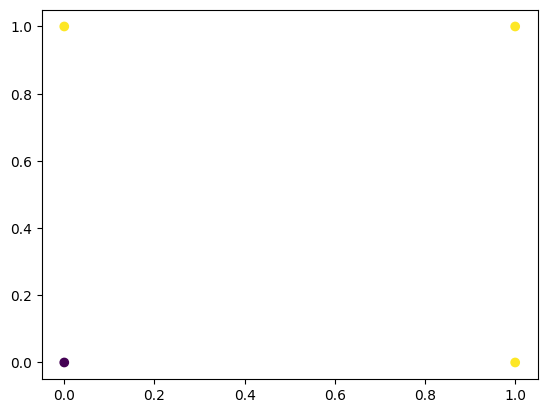

In [60]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels[:])
plt.show()

In [65]:
for epoch in range(100):
  for x,y in zip(inputs, labels):
    loss = train(x,y)
  if (epoch+1)%10 ==0:
    print("Epoch {}: loss={}".format(epoch+1, float(loss)))

Epoch 10: loss=0.043898921459913254
Epoch 20: loss=0.04829181358218193
Epoch 30: loss=0.05230076611042023
Epoch 40: loss=0.05593011900782585
Epoch 50: loss=0.05919330567121506
Epoch 60: loss=0.062109723687171936
Epoch 70: loss=0.06470214575529099
Epoch 80: loss=0.0669952854514122
Epoch 90: loss=0.06901408731937408
Epoch 100: loss=0.07078303396701813


In [66]:
predictions = predict(inputs)

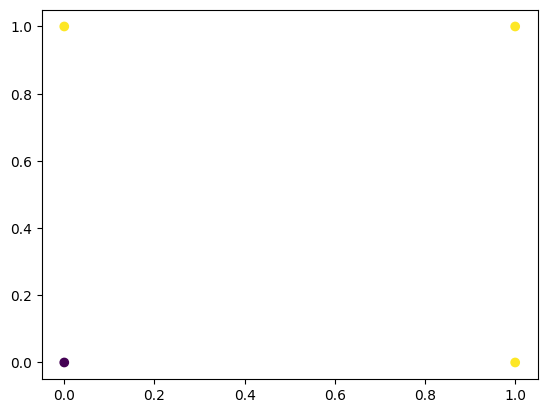

In [67]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:]> 0.5)
plt.show()

In [71]:
print('*******모델의 예측 결과*******')
print(predictions>0.5)
print(predictions[:]> 0.5)

*******모델의 예측 결과*******
tensor([[False],
        [ True],
        [ True],
        [ True]])
tensor([[False],
        [ True],
        [ True],
        [ True]])
